# Problem set #2 PHY256 

###  Problem 1.  Checking precision

Computing a series expansion

The Reimann zeta function is 
$$ \zeta (s) = \sum_{n=1}^\infty \frac{1}{n^s} $$

1. Write a routine to compute the Reimann zeta function $\zeta(s)$, using the sum, that is accurate to 1e-7 for $s \in [2,3]$.   How many terms in the sum are needed to achieve this accuracy?   

2. Check with scipy.special.zeta() that your function is this accurate. In other words, check that the absolute value of the difference between the output of your routine and the special function is smaller than $10^{-7}$.

3. Why is it hard to compute the Reimann zeta function with the series for $s$ near but above 1?    How small are the terms and how fast does the sum converge? 

4. What is the role of round-off error?  What order are terms summed in your routine and does this affect the accuracy of your routine?


Note *math.sum()* or *math.fsum()*  or *numpy.sum()* could be used on a vector or you can sum within a loop.   If you sum with a loop you can consider the order that you are doing the sum.  If you add extremely small numbers to large numbers ones then you will have a larger error than if you first add small numbers together and then add on the larger ones.  Arithmetic on vectors is fairly efficient in python and loops are often not as a efficient. I found I needed over 10 million terms in the sum. 

On *sum* and *fsum*
 https://docs.python.org/3.8/library/math.html

### Problem 2.  Iterates of a function like the logistic map, making a Feigenbaum plot

We define a function 
$$f(x) = \mu x^\alpha(1-x^\alpha)$$ 
The iterates of the function depend on  $\mu$.   Here $\alpha >0$.

We use $f^i(x_0)$ to mean you iterate the function $i$ times, so $f^2(x_0) = f(f(x_0))$ and 
$f^3(x_0) = f(f(f(x_0)))$.  

Iterates of a function are interesting for their own sake.  Numerical integrators give iterates of a function. There are practical as well as mathematical reasons for studying them.

Chose a value for $\alpha$ but don't use 1 as that makes it the same as the logistic map. 

1.  Plot as points $f^j(x_0), f^{j+1}(x_0), ..... f^{j+n}(x_0)$ for $j=50, n=50$, as a function of $\mu$ (on the x axis) and with your chosen value for $\alpha$. Here you discard the first $j$ iterates and then you plot $n$ iterates.  Each point has x coordinate set by $\mu$ and y coordinate set by the function iterate.  Adjust the range of $\mu$ plotted, the initial condition and the number of $\mu$ values used to make the plot. Your goal is to make something that looks like a Feigenbaum plot. 

In other words for each value of $\mu$, plot 50 iterates, but after discarding the first 50 iterates.    For large $\mu$ the iterates increase and eventually go to infinity.  For small $\mu$ the iterates decrease and eventually go to zero.
The range of $\mu$ you will use depends on your choice for $\alpha$.
You need to find the region in $\mu$ that gives interesting orbits.    If you use $\alpha=2$, I found initial condition $x_0=0.5$ was fine.  For $\alpha=3$
I found it was easier to get a nice plot with $x_0 = 0.8$. 

2.    Increase the number of iterates ($n$ and $j$) and to make the plot look better.  Start with a hundred values of $\mu$ (the $x$ axis values  of your plot) and then after you find which region is interesting, reduce the range and increase the numbers of $\mu$ values you are using to compute iterates and plot. Likely you will be making a *for* loop in which $\mu$ is increasing each time the loop executes.

3.  Find regions of $\mu$ that give the three different types of orbits (convergin to a fixed point, convering to a periodic orbit, or chaotic).

4.  What range of values of $\mu$ show period doubling?  Period doubling is when the orbits are periodic orbits but as $\mu$ is increased the period of the orbits doubles and then doubles again.  First you might see period 2 orbits and then period 4 orbits and then period 8 orbits.     The distance in $\mu$ that it takes for each doubling step decreases.  At the end of the doubling the orbits are chaotic.

5.  What value of $\mu$ do you see period 3 attracting periodic orbits? After chaotic behavior and at larger values of $\mu$ the map can again show periodic orbits.


The set of interates $f^j(x_0)$ for $j \in 1,2,3, .. \to \infty$ is called an *orbit*.
There are three different types of orbits.

+  The orbit settles down to a particular number and stays there. The orbit converges to a fixed point. A fixed point is $x$ such that  $f(x)=x$.  For our function $x=0$ is a fixed point because $f(0)=0$.  There may be other fixed points.  

+  The orbit doesn’t converge to a single value, but it moves into a periodic pattern, rotating around a set of values. If the iterates rotate among four values, repeating them in sequence over and over, then it is a period-4 periodic orbit.  A period 4 orbit satisfies $f^4(x)=x$ at point $x$.

+  The orbit is a seemingly random sequence of numbers.  This is deterministic chaos. “Chaos” because it looks chaotic, does not repeat values and “deterministic” because even though the values look randomly generated, they’re not. They’re predictable, because they are given to you by one equation and there is a recipe for generating new points.  They are not randomly generated (no random number generator was used).   The orbit never settles down to or approaches a fixed value or becomes periodic.  The orbit never converges to a point or a periodic orbit or repeats.


Some isues with the code:

I found that sometimes it helped if I cut the function off for large values  (send it to zero if its absolute value is too large).  I found that if I plotted each point separately the routine took much longer than if I appended points to an array and plotted arrays.  I increased the dpi (dots per inch) of the figure and explored using different backends to increase the resolution of my plot. 
For $\alpha=3$ I found it was faster to start with a larger initial condition $x_0 = 0.8$ than $x_0 = 0.5$.  If you see a plot that looks like a Feigenbaum plot then you have succeeded! 


See
https://en.wikipedia.org/wiki/Bifurcation_diagram
and 
https://en.wikipedia.org/wiki/Logistic_map

I found the numpy *append* function useful 
https://numpy.org/doc/stable/reference/generated/numpy.append.html

(-0.04, 1.1)

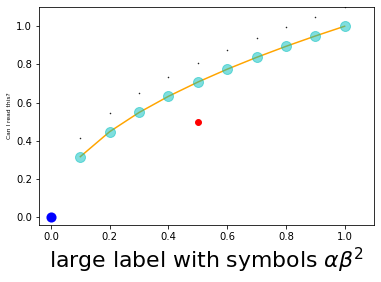

In [2]:
# example of scatter plots
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.scatter(0,0,c='b',s=100, linewidth=0.1);# plot a single blue point, s controls its size
plt.scatter(0.5,0.5,c='r',s=35); #plot a single red point, size is specified with s=35
x = np.linspace(0.1,1,10)
y2 = 1-np.sqrt(x)
y = np.sqrt(x)
# the routines plot and scatter have some what different syntax
plt.plot(x,y,'-',color='orange',alpha=1); #plot an opaque orange line
plt.plot(x,y,'co',ms=10,alpha=0.5); #plot see-through cyan points
plt.plot(x,y+0.1,'k.',ms=1); #plot small black  points
#plt.axis([-0.02,1,-0.02,1])  # set axis limits
plt.xlabel(r"large label with symbols $\alpha \beta^2$", fontsize=22) 
# r in front of string means \ will be interpreted correctly for TeX labels
plt.ylabel("Can I read this?", fontsize=6)  # how to make your axes (un)readable
plt.xlim(-0.04, 1.1)  # hard set limits
plt.ylim(-0.04, 1.1)

# you will want very small points for your plot

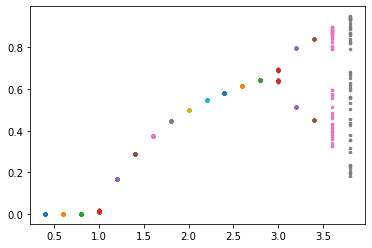

In [3]:
# define a function f()
def f(x,mu):
    return mu*x*(1-x)  # the logistic map

# an example of a routine that returns 50 iterates of a function f
# after discarding the first 50 iterates
# x0 is the initial condition
# f is the function that is iterated 
# the function f depends on mu and this is also an argument
def return50(f,x0,mu):
    x =x0 # initial value 
    ff_arr =np.zeros(0) # an empty array for the interates
    for i in range(50):  # iterate 50 times but don't store information
        y = f(x,mu)
        x = y  # we use the y value as the next x
    for i in range(50): # in this loop we save the values
        y = f(x,mu)
        x = y  # iterate! this is the next x
        ff_arr = np.append(ff_arr,x)  # append x to array
    return ff_arr  # return the iterates as an array
 
#Plot some iterates
mu=0.4; x0=0.5;
for i in range(19):
    yarr = return50(f,x0,mu);  #yvalues in the plot are the iterates 
    muarr = np.zeros(50) + mu;  # xvalues in the plot are the mu values
    # here I want an array of the same mu values
    # I multiplied an array by zero so that I would have an array
    # and so that the array would have the same size as xarr
    plt.plot(muarr,yarr,'.',ms=5)  # plot the 50 points
    mu+=0.2;   # increase mu

    
# Your goal is to make a plot that is much much more detailed than this one!